In [69]:
import os
if not os.path.exists("constants.py"):
    os.chdir("..")
from constants import *
from utils_segment_image import *
from utils_segment_whole_slide import *
from segmentation_service import process_ndpi_segmentation_request
import os
np.random.seed(42)

In [70]:
import openslide
import json


ndpi_files = [s for s in os.listdir(INPUT_TILES_PATH) if s.endswith(".ndpi") and not s in os.listdir(OUTPUT_TILES_PATH)]
print("Found NDPI files:", ndpi_files)
results = []
for ndpi_file in ndpi_files:
    slide = openslide.OpenSlide(os.path.join(INPUT_TILES_PATH, ndpi_file))
    result = process_ndpi_segmentation_request(slide=slide, output_tiles_path=os.path.join(OUTPUT_TILES_PATH, ndpi_file))
    # Save the result to {OUTPUT_TILES_PATH}/{ndpi_file}/output_stats.json
    output_stats_path = os.path.join(OUTPUT_TILES_PATH, ndpi_file, OUTPUT_STATS_FILENAME)
    os.makedirs(os.path.dirname(output_stats_path), exist_ok=True)
    with open(output_stats_path, 'w') as f:
        json.dump(result, f)
    logging.info(f"Output stats saved to: {output_stats_path}")
    
    results.append({ndpi_file: result})
    slide.close()



Found NDPI files: ['01_D23-044303 A1-1 H&E - 2024-06-20 13.49.00_Mucosa_Banff 3A.ndpi']


2025-05-08 01:17:19,721 - INFO - Overlay image with contours saved to: /Users/marie/Downloads/ndpi Files analysis/01_D23-044303 A1-1 H&E - 2024-06-20 13.49.00_Mucosa_Banff 3A.ndpi/overlay_image_with_contours.png
2025-05-08 01:17:20,055 - INFO - 
[Contour #1] bounding rect (level-8 coords): (323, 275, 70, 47)
2025-05-08 01:17:20,056 - INFO - [Contour #1] bounding rect (level-0 coords): (82688, 70400, 17920, 12032)
2025-05-08 01:19:19,233 - INFO - [Contour #1] total nuclei count: 57811
2025-05-08 01:19:19,233 - INFO - [Contour #1] Non-background area: 4.40 mm²
2025-05-08 01:19:32,902 - INFO - [Contour #1] Mosaic saved to: /Users/marie/Downloads/ndpi Files analysis/01_D23-044303 A1-1 H&E - 2024-06-20 13.49.00_Mucosa_Banff 3A.ndpi/contour_001_puzzle.png
2025-05-08 01:19:32,902 - INFO - 
[Contour #2] bounding rect (level-8 coords): (597, 281, 70, 48)
2025-05-08 01:19:32,902 - INFO - [Contour #2] bounding rect (level-0 coords): (152832, 71936, 17920, 12288)
2025-05-08 01:21:37,279 - INFO - [

In [50]:
results

[{'01_D23-044303 A1-1 H&E - 2024-06-20 13.49.00_Mucosa_Banff 3A.ndpi': {'total_nuclei_count': 278180,
   'total_non_background_area_mm2': 21.39834292832813}},
 {'BPC-20-MK-3289 BS15J00678 A1 - 2024-12-03 12.14.37_Mucosa Banff 2.ndpi': {'total_nuclei_count': 101690,
   'total_non_background_area_mm2': 9.78402624589073}},
 {'RC-2-Skin Native 03 17 25 - 2025-03-25 13.28.11.ndpi': {'total_nuclei_count': 209478,
   'total_non_background_area_mm2': 15.37122863113847}},
 {'D24-018959 B1-1 H&E - 2024-06-20 14.48.59_Mucosa Banff 0.ndpi': {'total_nuclei_count': 118757,
   'total_non_background_area_mm2': 14.334064050428687}},
 {'04_mucosa D23-031729 A1-1 - 2024-02-22 15.23.17_Mucosa_Banff 3A.ndpi': {'total_nuclei_count': 49149,
   'total_non_background_area_mm2': 4.778021350142896}},
 {'Grade 3_BPC-20-MK-3289 BS-19-G55249 C1 - 2024-12-03 11.56.50_RC.ndpi': {'total_nuclei_count': 83067,
   'total_non_background_area_mm2': 8.714751306645041}},
 {'05_face D22-037504 A1-1 - 2024-02-22 15.27.39_Skin_

In [51]:
for i, result in enumerate(results):
    ndpi_file = list(result.keys())[0]
    print(f"Slide {i+1}: {ndpi_file}")
    print(f"  Total Nuclei Count: {result[ndpi_file]['total_nuclei_count']}")
    print(f"  Total Non-background Area (mm²): {result[ndpi_file]['total_non_background_area_mm2']:.2f}")
    print(f"  Density (Nuclei/mm²): {result[ndpi_file]['total_nuclei_count'] / result[ndpi_file]['total_non_background_area_mm2']:.2f}")
    print()

Slide 1: 01_D23-044303 A1-1 H&E - 2024-06-20 13.49.00_Mucosa_Banff 3A.ndpi
  Total Nuclei Count: 278180
  Total Non-background Area (mm²): 21.40
  Density (Nuclei/mm²): 13000.07

Slide 2: BPC-20-MK-3289 BS15J00678 A1 - 2024-12-03 12.14.37_Mucosa Banff 2.ndpi
  Total Nuclei Count: 101690
  Total Non-background Area (mm²): 9.78
  Density (Nuclei/mm²): 10393.47

Slide 3: RC-2-Skin Native 03 17 25 - 2025-03-25 13.28.11.ndpi
  Total Nuclei Count: 209478
  Total Non-background Area (mm²): 15.37
  Density (Nuclei/mm²): 13627.93

Slide 4: D24-018959 B1-1 H&E - 2024-06-20 14.48.59_Mucosa Banff 0.ndpi
  Total Nuclei Count: 118757
  Total Non-background Area (mm²): 14.33
  Density (Nuclei/mm²): 8284.95

Slide 5: 04_mucosa D23-031729 A1-1 - 2024-02-22 15.23.17_Mucosa_Banff 3A.ndpi
  Total Nuclei Count: 49149
  Total Non-background Area (mm²): 4.78
  Density (Nuclei/mm²): 10286.48

Slide 6: Grade 3_BPC-20-MK-3289 BS-19-G55249 C1 - 2024-12-03 11.56.50_RC.ndpi
  Total Nuclei Count: 83067
  Total Non-

Output stats saved to: /Users/marie/Downloads/ndpi Files analysis/output_stats.csv
                                            ndpi_file  total_nuclei_count  \
0   'D24-012814 B1-1 Level 1, 2, 3' - 2024-06-20 1...              277921   
1                     01_01_07_25-1 SKIN_Banff 0.ndpi              115049   
2                     01_01_07_25_MUCOSA_Banff 2.ndpi               51822   
3   01_D23-044303 A1-1 H&E - 2024-06-20 13.49.00_M...              278180   
4   01_upper lip D23-048980 A1-1 - 2024-02-22 15.2...               72317   
5          02_-1-Skin Allograft 03_17_25_Banff 0.ndpi               99343   
6      02_-3-Mucosa Allograft 03_17_25_Banff 0-1.ndpi              130624   
7   02_Banff 2_8_26_2019_BPC-20-MK-3289 BS-19-T503...               19093   
8   02_D24-012814 A1-1 Level 1, 2, 3' - 2024-06-20...              239272   
9   02_D24-012814 C1-1 Level 1, 2, 3' - 2024-06-20...              267431   
10  02_grade 0_8_5_2019BPC-20-MK-3289 BS-19-E45967...               12

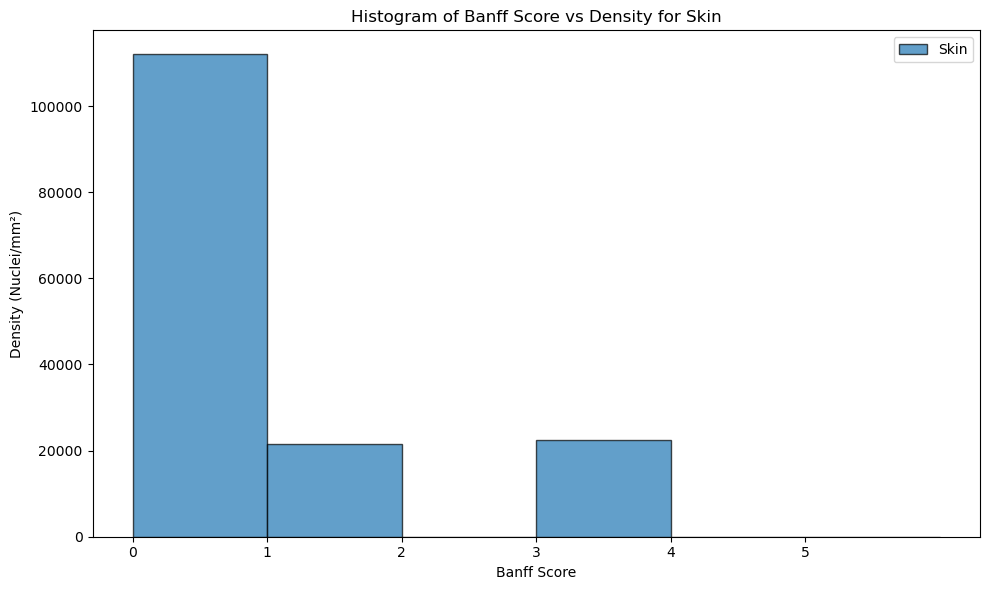

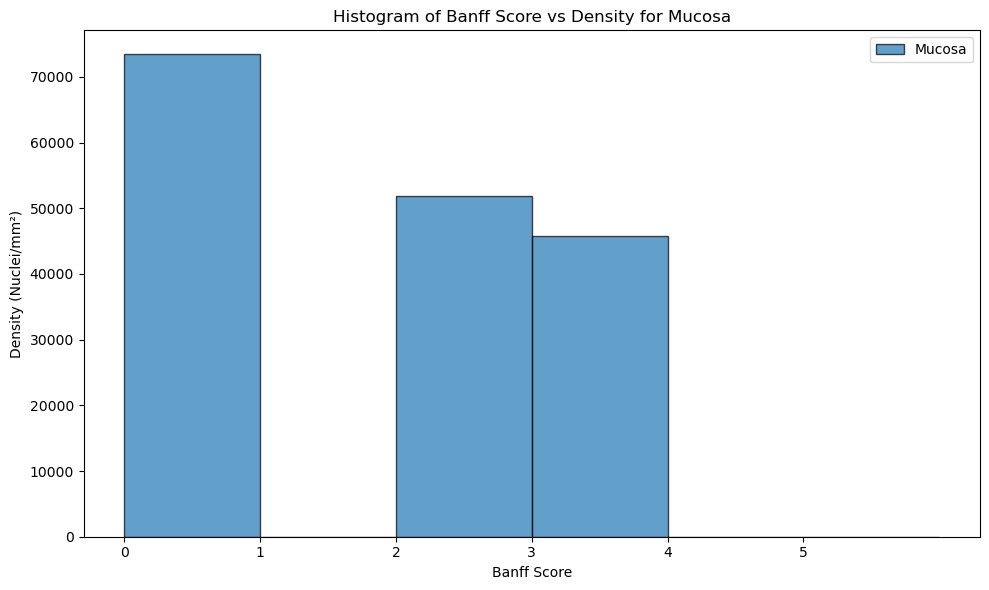

In [53]:
directories = os.listdir(OUTPUT_TILES_PATH)
# make a csv based on the json output_stats.json in each directory.
# Each json file (output_stats.json) contains:
# {
#     "total_nuclei_count": 123,
#     "total_non_background_area_mm2": 456.78
# }
# Each directory is named after the ndpi file.
# The csv should have the following columns:
# ndpi_file,total_nuclei_count,total_non_background_area_mm2,density
import pandas as pd
import json
import os
import csv
import glob
import numpy as np

# Create a list to hold the data
data = []
# Iterate through each directory in the OUTPUT_TILES_PATH
for directory in directories:
    # Construct the path to the output_stats.json file
    json_file_path = os.path.join(OUTPUT_TILES_PATH, directory, OUTPUT_STATS_FILENAME)
    # Check if the file exists
    if os.path.exists(json_file_path):
        # Open and read the JSON file
        with open(json_file_path, 'r') as f:
            stats = json.load(f)
        # Append the data to the list
        data.append({
            'ndpi_file': directory,
            'total_nuclei_count': stats['total_nuclei_count'],
            'total_non_background_area_mm2': stats['total_non_background_area_mm2'],
            'density': stats['total_nuclei_count'] / stats['total_non_background_area_mm2'],
            'mucosa/skin': 'mucosa' if 'mucosa' in directory.lower() else 'skin' if 'skin' in directory.lower() else None,
            'banff score 0-5': '0.5' if '0-1' in directory.lower() else '2.5' if '2-3' in directory.lower() else '4.5' if '4-5' in directory.lower() else '1' if 'banff 1' in directory.lower() or 'grade 1' in directory.lower() else '2' if 'banff 2' in directory.lower() or 'grade 2' in directory.lower() else '3' if 'banff 3' in directory.lower() or 'grade 3' in directory.lower() else '4' if 'banff 4' in directory.lower() or 'grade 4' in directory.lower() else '5' if 'banff 5' in directory.lower() or 'grade 5' in directory.lower() else '0' if 'banff 0' in directory.lower() or 'grade 0' in directory.lower() else None,
        })
# Create a DataFrame from the list
df = pd.DataFrame(data)
# Save the DataFrame to a CSV file
output_csv_path = os.path.join(OUTPUT_TILES_PATH, "output_stats.csv")
df = df.sort_values(by='ndpi_file')
df.to_csv(output_csv_path, index=False)
print(f"Output stats saved to: {output_csv_path}")
# Read the CSV file and print its contents
df = pd.read_csv(output_csv_path)
print(df)
# Plot the density of nuclei per mm² for each slide
import matplotlib.pyplot as plt

# Filter out rows with None values in 'banff score 0-5' or 'mucosa/skin'
filtered_df = df.dropna(subset=['banff score 0-5', 'mucosa/skin'])

# Separate data for skin and mucosa
skin_df = filtered_df[filtered_df['mucosa/skin'] == 'skin']
mucosa_df = filtered_df[filtered_df['mucosa/skin'] == 'mucosa']

# Plot histogram for skin
plt.figure(figsize=(10, 6))
plt.hist(skin_df['banff score 0-5'], weights=skin_df['density'], bins=range(7), alpha=0.7, label='Skin', edgecolor='black')
plt.xlabel('Banff Score')
plt.ylabel('Density (Nuclei/mm²)')
plt.title('Histogram of Banff Score vs Density for Skin')
plt.xticks(range(6))
plt.legend()
plt.tight_layout()
plt.show()

# Plot histogram for mucosa
plt.figure(figsize=(10, 6))
plt.hist(mucosa_df['banff score 0-5'], weights=mucosa_df['density'], bins=range(7), alpha=0.7, label='Mucosa', edgecolor='black')
plt.xlabel('Banff Score')
plt.ylabel('Density (Nuclei/mm²)')
plt.title('Histogram of Banff Score vs Density for Mucosa')
plt.xticks(range(6))
plt.legend()
plt.tight_layout()
plt.show()

In [68]:
import pandas as pd
from scipy.stats import ttest_ind

# Load your file
df = pd.read_csv('/Users/marie/Downloads/fourth_analysis_c=15/output_stats.csv')


# -------- General (All samples) --------
group_high = df[df['banff score 0-5'] >= 3]['density']
group_low = df[df['banff score 0-5'] < 3]['density']

t_stat, p_val_two_sided = ttest_ind(group_high, group_low, equal_var=False)

# One-sided adjustment
if t_stat > 0:
    p_val_one_sided = p_val_two_sided / 2
else:
    p_val_one_sided = 1 - (p_val_two_sided / 2)

print('--- General (All samples) ---')
print('t-statistic:', t_stat)
print('one-sided p-value:', p_val_one_sided)
print()

# -------- Skin samples only --------
df_skin = df[df['mucosa/skin'] == 'skin']
group_high_skin = df_skin[df_skin['banff score 0-5'] >= 3]['density']
group_low_skin = df_skin[df_skin['banff score 0-5'] < 3]['density']

t_stat_skin, p_val_two_sided_skin = ttest_ind(group_high_skin, group_low_skin, equal_var=False)

if t_stat_skin > 0:
    p_val_one_sided_skin = p_val_two_sided_skin / 2
else:
    p_val_one_sided_skin = 1 - (p_val_two_sided_skin / 2)

print('--- Skin samples only ---')
print('t-statistic:', t_stat_skin)
print('one-sided p-value:', p_val_one_sided_skin)
print()

# -------- Mucosa samples only --------
df_mucosa = df[df['mucosa/skin'] == 'mucosa']
group_high_mucosa = df_mucosa[df_mucosa['banff score 0-5'] >= 3]['density']
group_low_mucosa = df_mucosa[df_mucosa['banff score 0-5'] < 3]['density']

t_stat_mucosa, p_val_two_sided_mucosa = ttest_ind(group_high_mucosa, group_low_mucosa, equal_var=False)

if t_stat_mucosa > 0:
    p_val_one_sided_mucosa = p_val_two_sided_mucosa / 2
else:
    p_val_one_sided_mucosa = 1 - (p_val_two_sided_mucosa / 2)

print('--- Mucosa samples only ---')
print('t-statistic:', t_stat_mucosa)
print('one-sided p-value:', p_val_one_sided_mucosa)


--- General (All samples) ---
t-statistic: 1.9315438977329509
one-sided p-value: 0.03257907872881093

--- Skin samples only ---
t-statistic: 0.4578115406589116
one-sided p-value: 0.3264377399073003

--- Mucosa samples only ---
t-statistic: 1.9749950989820222
one-sided p-value: 0.039515385450464874
